# Radar Analysis

Analyzing radar information on human subjects before and after exertion. 

## Files

### Initial Data

Stored in directory `../media/radar/01_sample`. Includes data on `kyle`, `phil`, `steve`, and `zhao`. Each person has `base` and `after` data for exertion, and they are stored as text files.

Example file name: `../media/radar/01_sample/kyleafter.txt`

### MetaData

* `Sample Rate`: 22050 Hz (though I think it is likely 2250 Hz)

## Analysis Methods

1. Simple Plots for Generic Visualization.
2. Fourier analysis (comparison of formants, frequency distributions, etc.).
3. Chirplet transform analysis (see matlab code here: https://www.mathworks.com/matlabcentral/fileexchange/72303-chirplet-transform)

## Next Steps

### Immediate

* Run Steve's 

In [170]:
### IMPORT BOX ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from scipy.signal import freqz
from scipy.signal import butter, lfilter

# Uniform Styling of plots
plt.style.use('fast')
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [171]:
### CONSTANTS ###
SAMPLE_RATE = 2250

In [172]:
"""
=== OBTAINING ALL DATA ===
"""

folder_path = '../media/radar/01_sample/'

names = [
    'kyle',
    'phil',
    'steve',
    'zhao',
]

# Each person has 'base' and 'after' data.

data = {}

for name in names:
    data[name] = {}
    data[name]['base'] = []
    data[name]['after'] = []
    
    base_df_in = pd.read_csv(str(folder_path + name + 'base.txt'), sep='\t')
    base_df_in.columns = ['col1', 'col2', 'col3', 'col4']
    
    after_df_in = pd.read_csv(str(folder_path + name + 'after.txt'), sep='\t')
    after_df_in.columns = ['col1', 'col2', 'col3', 'col4']
    
    data[name]['base'] = [np.asarray(base_df_in['col1'].fillna(0), dtype=np.float32),
                          np.asarray(base_df_in['col2'].fillna(0), dtype=np.float32),
                          np.asarray(base_df_in['col3'].fillna(0), dtype=np.float32), 
                          np.asarray(base_df_in['col4'].fillna(0), dtype=np.float32)]
    
    data[name]['after'] = [np.asarray(after_df_in['col1'].fillna(0), dtype=np.float32), 
                           np.asarray(after_df_in['col2'].fillna(0), dtype=np.float32), 
                           np.asarray(after_df_in['col3'].fillna(0), dtype=np.float32), 
                           np.asarray(after_df_in['col4'].fillna(0), dtype=np.float32)]
    
    print('Import of {}\'s data: Done'.format(name))
    
print('\n\nData Summary\n\n')

data

Import of kyle's data: Done
Import of phil's data: Done
Import of steve's data: Done
Import of zhao's data: Done


Data Summary




{'kyle': {'base': [array([-2686., -2633., -2645., ..., -1012., -1015., -1020.], dtype=float32),
   array([-295., -253., -232., ...,  135.,  152.,   32.], dtype=float32),
   array([-5190., -4887., -4685., ...,  -886.,  -938., -1800.], dtype=float32),
   array([ -8923., -12086.,  -9775., ...,  29119.,  27447.,  23804.],
         dtype=float32)],
  'after': [array([-2761., -2758., -2756., ...,  1852.,  1824.,  1852.], dtype=float32),
   array([-236., -196., -140., ..., -196., -292., -293.], dtype=float32),
   array([-4253., -3901., -3809., ..., -4173., -5269., -4683.], dtype=float32),
   array([ 2875.,  2119.,  2641., ..., -5498., -8219., -6649.], dtype=float32)]},
 'phil': {'base': [array([611., 623., 630., ..., 517., 600., 512.], dtype=float32),
   array([-180., -114.,  -47., ...,    7.,   20.,    0.], dtype=float32),
   array([-4086., -3211., -2823., ..., -2053., -1523.,     0.], dtype=float32),
   array([  293.,  2985.,  8277., ..., 17586., 22645.,     0.], dtype=float32)],
  'after':

In [173]:
# Bandpass Filter Functions

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

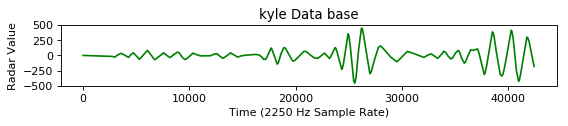

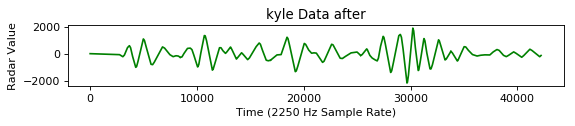

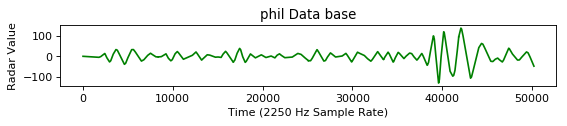

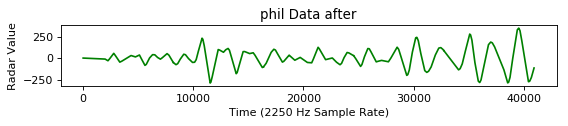

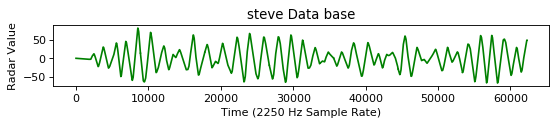

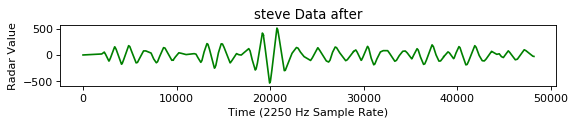

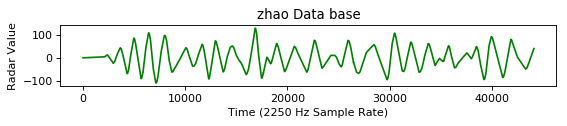

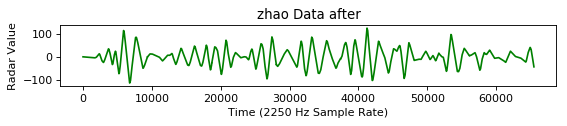

In [174]:
### Plotting Everything and Smoothing ###

smoothed_data = data

unsmoothed_before = data['zhao']['base'][1]
unsmoothed_after = data['zhao']['after'][1]

for person in data: # person = kyle, steve, ...
    for time in data[person]: # time = before, after
#         for arry in data[person][time]: # arry is one of the four numpy arrays
        arry = data[person][time][1]
        
        # smoothing...
        for i in range(30):
            arry = butter_bandpass_filter(arry, .3, 6, SAMPLE_RATE, order=1)
            
        smoothed_data[person][time][1] = arry

        # plotting...
        
        figure(num=None, figsize=(8, 1), dpi=80, facecolor='w', edgecolor='k')
        
        plt.plot(arry*-1, 'g')
        plt.title('{} Data {}'.format(person, time))
        plt.xlabel('Time ({} Hz Sample Rate)'.format(SAMPLE_RATE))
        plt.ylabel('Radar Value')
        
        plt.show()



In [175]:
smoothed_data

{'kyle': {'base': [array([-2686., -2633., -2645., ..., -1012., -1015., -1020.], dtype=float32),
   array([-2.46648848e-61, -1.48935078e-59, -4.49647809e-58, ...,
           1.80147814e+02,  1.80704953e+02,  1.81258859e+02]),
   array([-5190., -4887., -4685., ...,  -886.,  -938., -1800.], dtype=float32),
   array([ -8923., -12086.,  -9775., ...,  29119.,  27447.,  23804.],
         dtype=float32)],
  'after': [array([-2761., -2758., -2756., ...,  1852.,  1824.,  1852.], dtype=float32),
   array([-1.97319079e-61, -1.19094552e-59, -3.59361597e-58, ...,
           1.35621243e+02,  1.34704636e+02,  1.33785866e+02]),
   array([-4253., -3901., -3809., ..., -4173., -5269., -4683.], dtype=float32),
   array([ 2875.,  2119.,  2641., ..., -5498., -8219., -6649.], dtype=float32)]},
 'phil': {'base': [array([611., 623., 630., ..., 517., 600., 512.], dtype=float32),
   array([-1.50497602e-61, -9.05380843e-60, -2.72272980e-58, ...,
           4.77186495e+01,  4.77382823e+01,  4.77572303e+01]),
   arr

In [176]:
# Outputting smoothed data => zhao => before, after to separate CSV's

np1 = smoothed_data['zhao']['base'][1]
np2 = smoothed_data['zhao']['after'][1]

zhao_before_df = pd.DataFrame(np1)
zhao_before_df[0].to_csv('zhao_before.csv', index=False)

zhao_after_df = pd.DataFrame(np2)
zhao_after_df[0].to_csv('zhao_after.csv', index=False)

bottom_val = 0.28

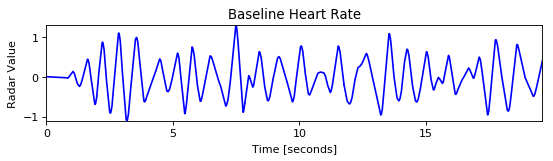

In [177]:
# Plotting the Baseline Smoothed Heart Rate

figure(num=None, figsize=(8, 2), dpi=80, facecolor='w', edgecolor='k')


t = np.arange(0, len(np1), 1, dtype=np.float32)

plt.plot(t*(1/SAMPLE_RATE), np1*-.01, 'b')
plt.title('Baseline Heart Rate')
plt.xlabel('Time [seconds]')
plt.ylabel('Radar Value')
plt.locator_params(axis='x', nbins=5)
plt.gcf().subplots_adjust(bottom=bottom_val)
plt.margins(0,0)
plt.savefig(folder_path+'figures/'+'butterworth_before.png', format='png', dpi=300)
plt.show()

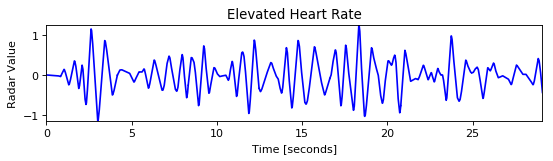

In [178]:
figure(num=None, figsize=(8, 2), dpi=80, facecolor='w', edgecolor='k')

t = np.arange(0, len(np2), 1, dtype=np.float32)


plt.plot(t*(1/SAMPLE_RATE), np2*-.01, 'b')
plt.title('Elevated Heart Rate')
plt.xlabel('Time [seconds]')
plt.ylabel('Radar Value')
plt.gcf().subplots_adjust(bottom=bottom_val)
plt.margins(0,0)
plt.savefig(folder_path+'figures/'+'butterworth_after.png', format='png', dpi=300)
plt.show()

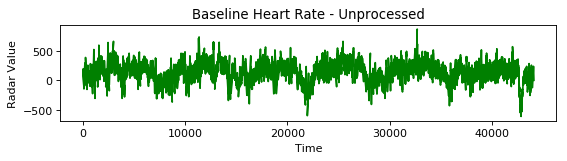

In [179]:
figure(num=None, figsize=(8, 2), dpi=80, facecolor='w', edgecolor='k')

plt.plot(unsmoothed_before*-1, 'g')
plt.title('Baseline Heart Rate - Unprocessed')
plt.xlabel('Time')
plt.ylabel('Radar Value')
plt.gcf().subplots_adjust(bottom=bottom_val)
plt.savefig(folder_path+'figures/'+'unprocessed_before.png', format='png', dpi=300)
plt.show()

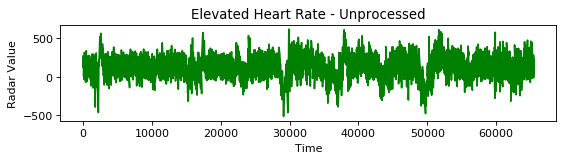

In [180]:
figure(num=None, figsize=(8, 2), dpi=80, facecolor='w', edgecolor='k')

plt.plot(unsmoothed_after*-1, 'g')
plt.title('Elevated Heart Rate - Unprocessed')
plt.xlabel('Time')
plt.ylabel('Radar Value')
plt.gcf().subplots_adjust(bottom=bottom_val)
plt.savefig(folder_path+'figures/'+'unprocessed_after.png', format='png', dpi=300)
plt.show()

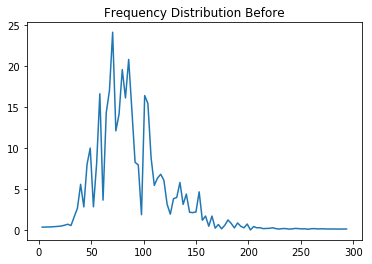

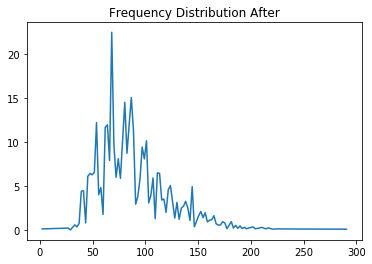

In [181]:
"""
=== Determining heart rate via Fourier Transform ===

This is the first approach among many for detecting heart rate from radar signal. The transform 
will be applied to the processed data for better signal clarity.
"""

fft_1 = np.fft.fft(np1)
fft_1_theo = 2.0*np.abs(fft_1/len(fft_1))

fft_freq = np.fft.fftfreq(len(fft_1))
mask = fft_freq > 0

MAX_BPM = 240

fft_2 = np.fft.fft(np2)
fft_2_theo = 2.0*np.abs(fft_2/len(fft_2))

fft_2_freq = np.fft.fftfreq(len(fft_2))
mask_2 = fft_2_freq > 0

# plt.plot(fft_1[len(fft_1)-400:])
plt.title('Frequency Distribution Before')
plt.plot(fft_freq[mask][:int(MAX_BPM/2.5)]*2250*60, fft_1_theo[mask][:int(MAX_BPM/2.5)])

# plt.savefig(folder_path+'figures/'+'kyle_freq_before.png', dpi=300)

plt.show()

plt.title('Frequency Distribution After')
plt.plot(fft_2_freq[mask_2][:int(MAX_BPM/1.7)]*2250*60, fft_2_theo[mask_2][:int(MAX_BPM/1.7)])

# plt.savefig(folder_path+'figures/'+'kyle_freq_after.png', dpi=300)

plt.show()

# print('Length of before: {}; Length of after: {}'.format(len(kylebase['col2']), len(kyleafter['col2'])))

In [183]:
x1 = fft_freq[mask][:int(MAX_BPM/2.5)]*2250*60
y1 = fft_1_theo[mask][:int(MAX_BPM/2.5)]

x2 = fft_2_freq[mask_2][:int(MAX_BPM/1.7)]*2250*60
y2 = fft_2_theo[mask_2][:int(MAX_BPM/1.7)]

rate_1 = sum(x1*y1) / sum(y1)
rate_2 = sum(x2*y2) / sum(y2)

print('Based on INTEGRATING FREQUENCY DISTRIBUTION:')
print("The heart rate from before was {} while the heart rate after was {} BPM".format(rate_1, rate_2))

Based on INTEGRATING FREQUENCY DISTRIBUTION:
The heart rate from before was 90.06087564042483 while the heart rate after was 90.85491473086316 BPM


In [184]:
### Via Selecting the Peak Frequency Spike
max_ind_1 = np.argmax(y1)
rate_1 = x1[max_ind_1]

max_ind_2 = np.argmax(y2)
rate_2 = x2[max_ind_2]

print('Based on PEAK FREQUENCY SELECTION:')
print("The heart rate from before was {} while the heart rate after was {} BPM".format(rate_1, rate_2))

Based on PEAK FREQUENCY SELECTION:
The heart rate from before was 70.35232808428685 while the heart rate after was 68.02980789787131 BPM


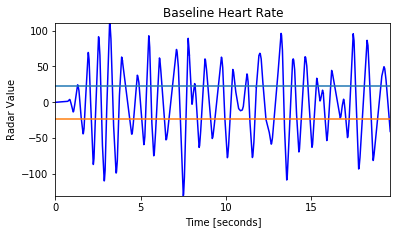

Num beats: 24 => Heart rate is 73.4111249575167 BPM


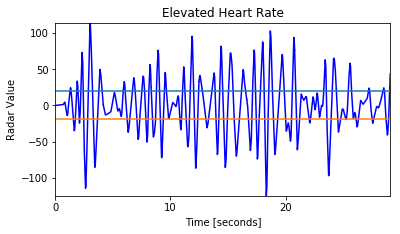

Num beats: 29 => Heart rate is 59.7837705769172 BPM


In [185]:
"""
=== Alternative Heart Beat Detection Tools: Detecting Fluctuations above STDEV ===

"""

stdev_1 = np.std(np1)*0.5


t = np.arange(0, len(np1), 1, dtype=np.float32)

plt.plot(t*(1/SAMPLE_RATE), np1, 'b')

plt.plot([0, t[len(t)-1]*(1/SAMPLE_RATE)], [stdev_1, stdev_1])
plt.plot([0, t[len(t)-1]*(1/SAMPLE_RATE)], [-stdev_1, -stdev_1])
plt.title('Baseline Heart Rate')
plt.xlabel('Time [seconds]')
plt.ylabel('Radar Value')
plt.locator_params(axis='x', nbins=5)
plt.gcf().subplots_adjust(bottom=bottom_val)
plt.margins(0,0)
plt.show()

num_beats = 0
prev = np1[0]
for i in np1:
    if i > stdev_1 and prev <= stdev_1:
        num_beats+=1
    
    prev = i

num_seconds = len(t)/2250
print('Num beats: {} => Heart rate is {} BPM'.format(num_beats, (num_beats/num_seconds) * 60))

### NOW FOR ELEVATED HEART RATE

stdev_1 = np.std(np2)*0.5


t = np.arange(0, len(np2), 1, dtype=np.float32)

plt.plot(t*(1/SAMPLE_RATE), np2, 'b')

plt.plot([0, t[len(t)-1]*(1/SAMPLE_RATE)], [stdev_1, stdev_1])
plt.plot([0, t[len(t)-1]*(1/SAMPLE_RATE)], [-stdev_1, -stdev_1])
plt.title('Elevated Heart Rate')
plt.xlabel('Time [seconds]')
plt.ylabel('Radar Value')
plt.locator_params(axis='x', nbins=5)
plt.gcf().subplots_adjust(bottom=bottom_val)
plt.margins(0,0)
plt.show()

num_beats = 0
prev = np2[0]
for i in np2:
    if i > stdev_1 and prev <= stdev_1:
        num_beats+=1
    
    prev = i

num_seconds = len(t)/2250
print('Num beats: {} => Heart rate is {} BPM'.format(num_beats, (num_beats/num_seconds) * 60))


In [ ]:
"""
=== PCA for heart beat detection... ===
https://www.hindawi.com/journals/jhe/2018/4832605/
"""